In [17]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()
import sklearn
import pandas as pd

#references https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html
#https://arxiv.org/pdf/1710.05398

### Super-Earths v.s Mini-Neptunes
A surprising recent result in the exoplanet field is that the radii of small planets have a bimodal distribution. There is a lower peak at 1.5 R_earth (Super-Earths) and a higher peak at about 2.5 R_earth (Mini-Neptunes).

Further observations reveal that Super-Earths are mostly bare rocks whereas Mini-Neptunes have substantial H/He envelopes

In [14]:
Image(url= "data/fulton_gap.png")
#http://ui.adsabs.harvard.edu/abs/2017AJ....154..109F/abstract

In [15]:
Image(url= "data/se-mn.jpg")

### Radius Valley vs Orbital Period
It was pointed that the radius valley separating the Super-Earths and Mini-Neptunes may have a dependence on orbital periods: atmospheric erosion of H/He envelope likely depends on orbital period.

Some suggest that it could be a power law dependence: $R_{\rm p, valley} \propto P^\alpha$

         Planet     Rp  Rp_unc     Period     Ms  Ms_unc_u  Ms_unc_l      Rs  \
0    Kepler-815  4.980   0.600   8.575222  1.690     0.500     0.500  3.8800   
1      HAT-P-11  4.887   0.065   4.887802  0.860     0.060     0.060  0.7600   
2     K00367.01  4.720   0.150  31.578671  1.110     0.090     0.090  1.0300   
3   Kepler-278b  4.590   0.260  30.158569  1.298     0.076     0.076  2.9350   
4      Kepler-4  4.220   0.120   3.213671  1.090     0.070     0.070  1.5500   
..          ...    ...     ...        ...    ...       ...       ...     ...   
93  Kepler-444e  0.533   0.019   7.743501  0.740     0.010     0.010  0.7492   
94  Kepler-444d  0.530   0.025   6.189513  0.740     0.010     0.010  0.7492   
95  Kepler-444c  0.490   0.024   4.545817  0.740     0.010     0.010  0.7492   
96  Kepler-444b  0.381   0.021   3.600125  0.740     0.010     0.010  0.7492   
97   Kepler-37b  0.354   0.014  13.368054  0.810     0.010     0.020  0.7725   

    Rs_unc_u  Rs_unc_l  SE_MN  
0     0

(1, 110)

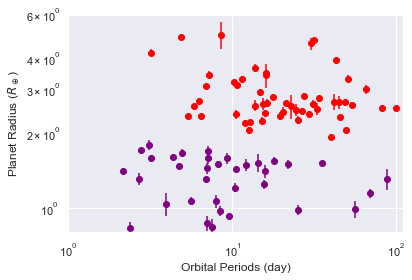

In [62]:
newdata = pd.read_csv('data/se-mn.csv',header=0)
print(newdata)
rp=np.array(newdata['Rp'],'d')
rp_unc=np.array(newdata['Rp_unc'],'d')
per=np.array(newdata['Period'],'d')
se_mn=np.array(newdata['SE_MN'],'i')
plt.errorbar(per[se_mn==-1],rp[se_mn==-1],yerr=rp_unc[se_mn==-1], color = 'purple', fmt = 'o')
plt.errorbar(per[se_mn==1],rp[se_mn==1],yerr=rp_unc[se_mn==1], color = 'red', fmt = 'o')
plt.yscale('log')
plt.xscale('log')

plt.xlabel('Orbital Periods (day)')
plt.ylabel('Planet Radius ($R_\oplus$)')
plt.ylim(0.8,6)
plt.xlim(1,110)

### Radius Valley using SVM
Let us determine the Radius Valley using the Support Vector Machine

In [63]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10) #let's use a simple linear boundary


X=np.vstack((np.log10(per), np.log10(rp))).T
y = se_mn
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [64]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Text(0, 0.5, 'log ($R_p/R_\\oplus$)')

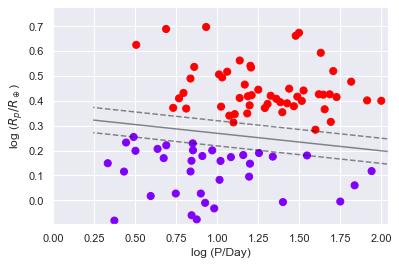

In [78]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')
plot_svc_decision_function(model)
plt.ylim(np.log10(0.8),np.log10(6))
plt.xlim(np.log10(1),np.log10(110))

plt.xlabel('log (P/Day)')
plt.ylabel('log ($R_p/R_\oplus$)')

# Exercise 1:
### Given that the weight vector w is of the SVM is:

print(model.coef_)

### how does the radius valley depend on the orbital period i.e. find alpha $R_{\rm p, valley} \propto P^\alpha$?

# Exercise 2:
### Using the bootstrap method and the reported uncertainty on radii of the planets, find the confidence interval of alpha.

